# **Challenge TelecomX LATAM**

## **Challenge de la Formación:** Aprendiendo a hacer ETL G8-ONE

## **Daniel Ortiz Aristizábal**

#📌 Extracción

## Extracción de datos

In [1]:
import pandas as pd
import requests

api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
res = requests.get(api)
df = res.json()

In [2]:
data = pd.json_normalize(df,sep='_')
pd.set_option('display.max_columns', None)
data.sample(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
1338,1930-WNXSB,No,Male,0,Yes,Yes,58,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.85,5305.05
6411,8805-JNRAZ,No,Female,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,49.20,103.7
2413,3372-KWFBM,Yes,Male,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.60,1281
4740,6496-SLWHQ,Yes,Male,1,No,No,3,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.00,294.45
5036,6891-JPYFF,No,Female,0,Yes,Yes,48,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.25,4997.5


#🔧 Transformación

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
import numpy as np

data['account_Charges_Total'] = data['account_Charges_Total'].apply(lambda x: x.replace(' ','0').strip())
data['account_Charges_Total'] = data['account_Charges_Total'].astype(np.float64)

In [5]:
data['customerID']=data['customerID'].astype('category')
data['Churn']=data['Churn'].astype('category')
data['customer_gender']=data['customer_gender'].astype('category')
data['customer_Partner']=data['customer_Partner'].astype('category')
data['customer_Dependents']=data['customer_Dependents'].astype('category')
data['phone_PhoneService']=data['phone_PhoneService'].astype('category')
data['phone_MultipleLines']=data['phone_MultipleLines'].astype('category')
data['internet_InternetService']=data['internet_InternetService'].astype('category')
data['internet_OnlineSecurity']=data['internet_OnlineSecurity'].astype('category')
data['internet_OnlineBackup']=data['internet_OnlineBackup'].astype('category')
data['internet_DeviceProtection']=data['internet_DeviceProtection'].astype('category')
data['internet_TechSupport']=data['internet_TechSupport'].astype('category')
data['internet_StreamingTV']=data['internet_StreamingTV'].astype('category')
data['internet_StreamingMovies']=data['internet_StreamingMovies'].astype('category')
data['account_Contract']=data['account_Contract'].astype('category')
data['account_PaperlessBilling']=data['account_PaperlessBilling'].astype('category')
data['account_PaymentMethod']=data['account_PaymentMethod'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   category
 1   Churn                      7267 non-null   category
 2   customer_gender            7267 non-null   category
 3   customer_SeniorCitizen     7267 non-null   int64   
 4   customer_Partner           7267 non-null   category
 5   customer_Dependents        7267 non-null   category
 6   customer_tenure            7267 non-null   int64   
 7   phone_PhoneService         7267 non-null   category
 8   phone_MultipleLines        7267 non-null   category
 9   internet_InternetService   7267 non-null   category
 10  internet_OnlineSecurity    7267 non-null   category
 11  internet_OnlineBackup      7267 non-null   category
 12  internet_DeviceProtection  7267 non-null   category
 13  internet_TechSupport       7267 n

In [6]:
data = data.drop('customerID', axis=1)
data.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Conociendo el conjunto de datos

In [7]:
data.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

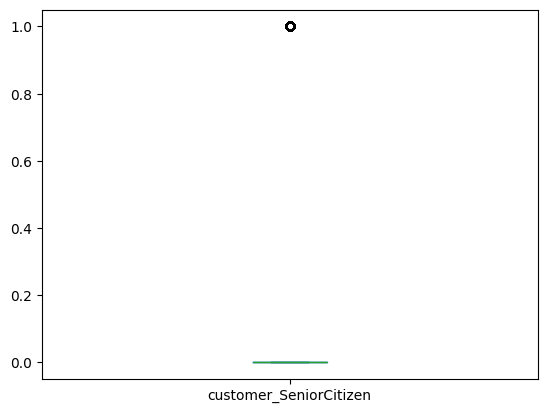

In [8]:
data['customer_SeniorCitizen'].plot(kind='box')

<Axes: >

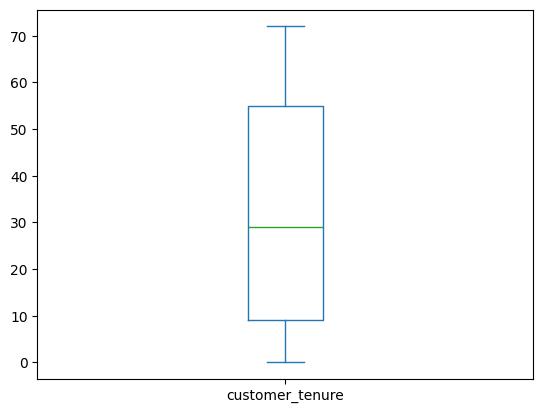

In [9]:
data['customer_tenure'].plot(kind='box')

<Axes: >

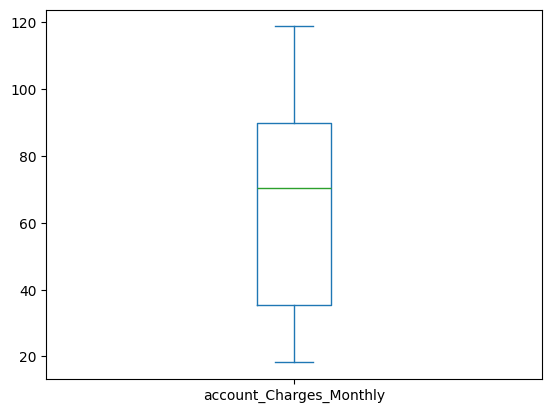

In [10]:
data['account_Charges_Monthly'].plot(kind='box')

<Axes: >

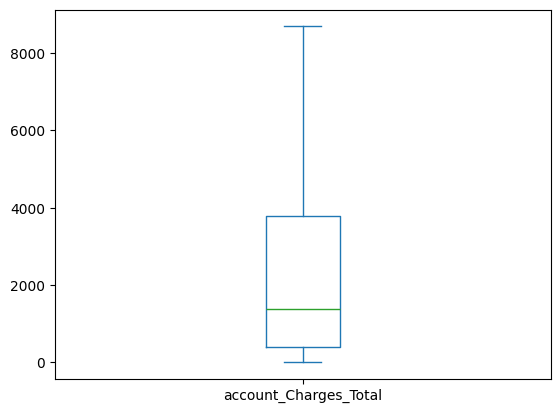

In [11]:
data['account_Charges_Total'].plot(kind='box')

<Axes: xlabel='Churn'>

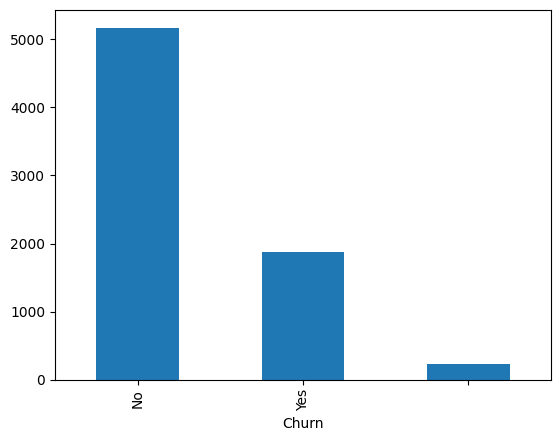

In [12]:
data['Churn'].value_counts().plot(kind='bar')

<Axes: xlabel='customer_gender'>

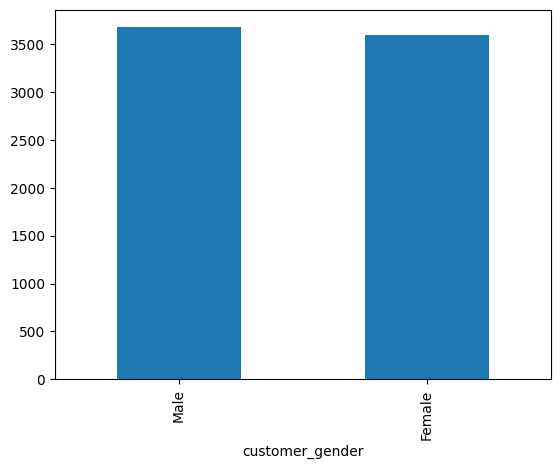

In [13]:
data['customer_gender'].value_counts().plot(kind='bar')

<Axes: xlabel='customer_Partner'>

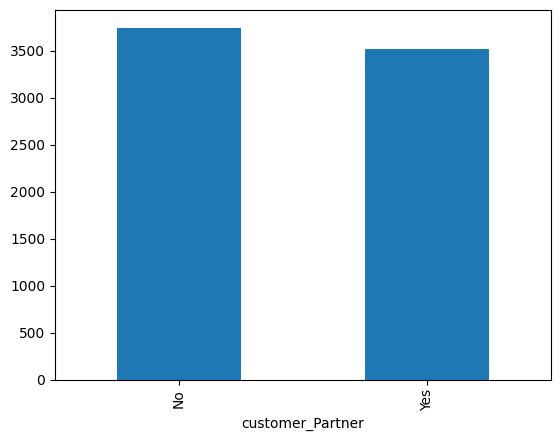

In [14]:
data['customer_Partner'].value_counts().plot(kind='bar')

<Axes: xlabel='customer_Dependents'>

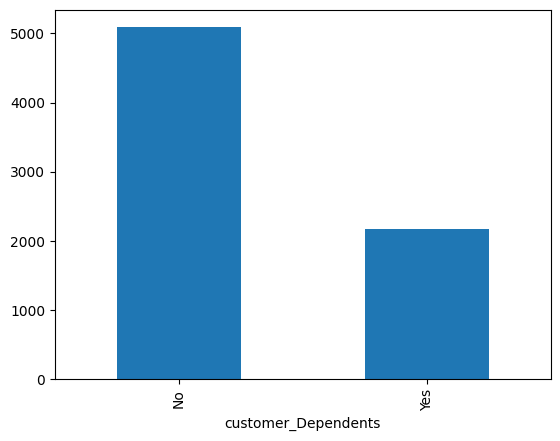

In [15]:
data['customer_Dependents'].value_counts().plot(kind='bar')

<Axes: xlabel='phone_PhoneService'>

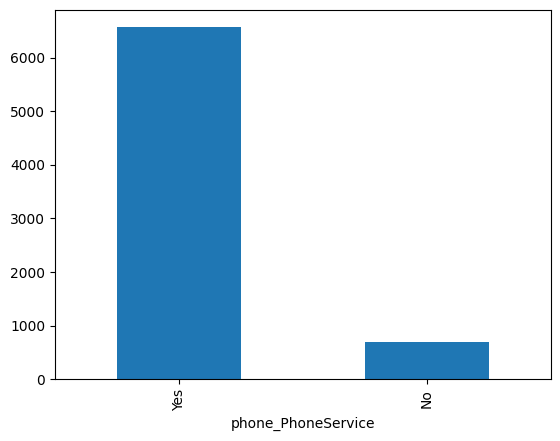

In [16]:
data['phone_PhoneService'].value_counts().plot(kind='bar')

<Axes: xlabel='phone_MultipleLines'>

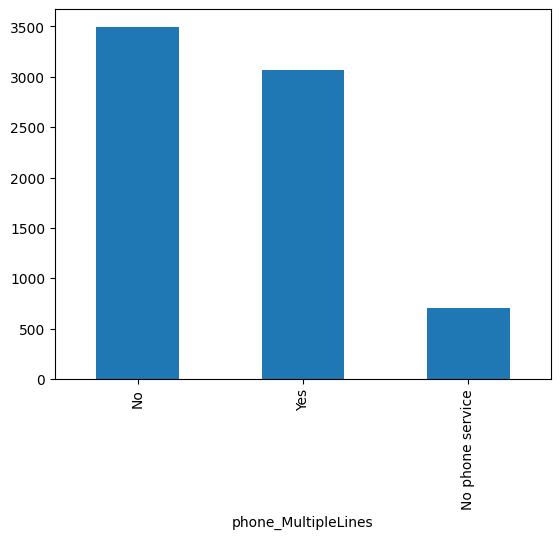

In [17]:
data['phone_MultipleLines'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_InternetService'>

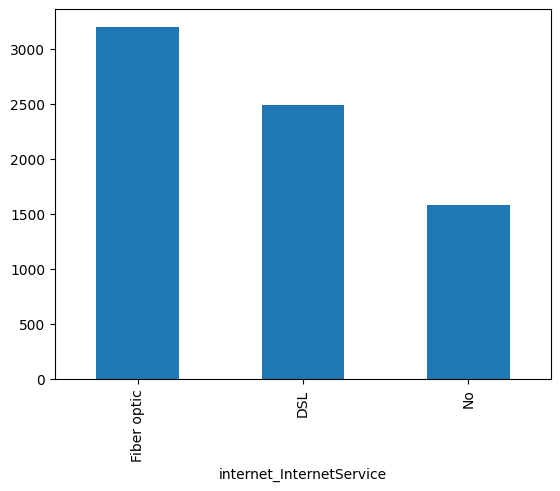

In [18]:
data['internet_InternetService'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_OnlineSecurity'>

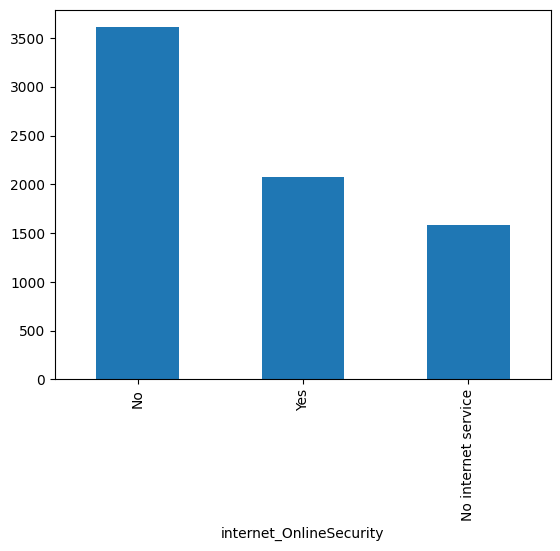

In [19]:
data['internet_OnlineSecurity'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_OnlineBackup'>

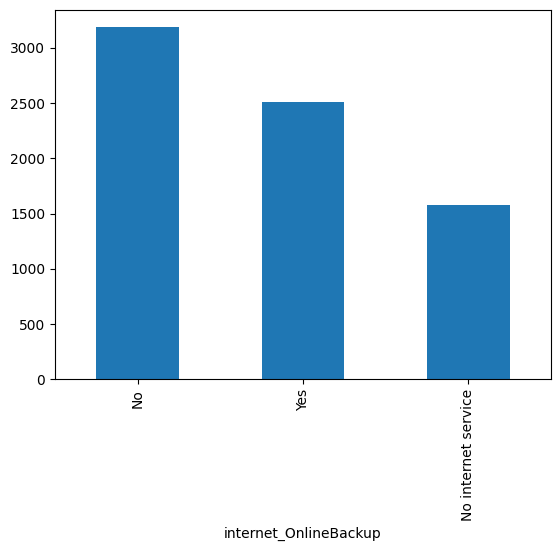

In [20]:
data['internet_OnlineBackup'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_DeviceProtection'>

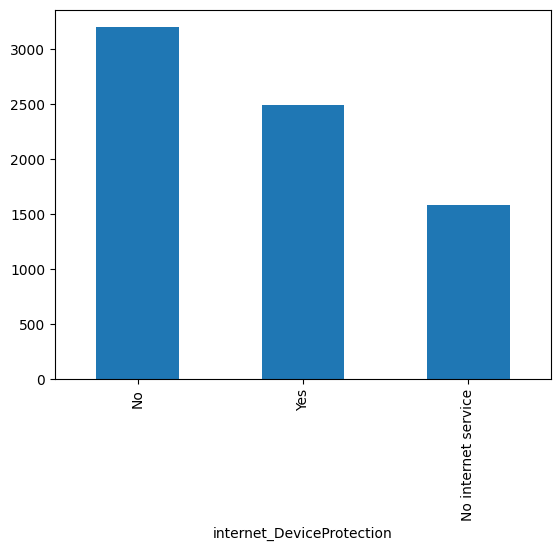

In [21]:
data['internet_DeviceProtection'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_TechSupport'>

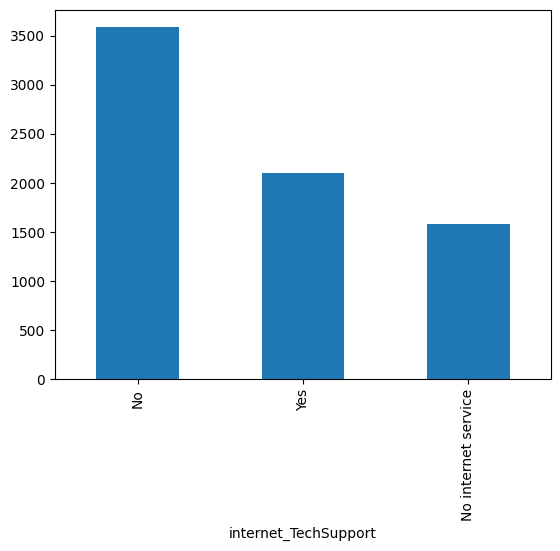

In [22]:
data['internet_TechSupport'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_StreamingTV'>

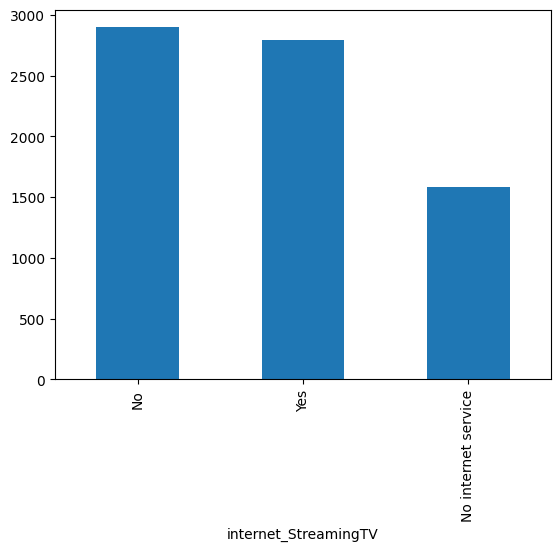

In [23]:
data['internet_StreamingTV'].value_counts().plot(kind='bar')

<Axes: xlabel='internet_StreamingMovies'>

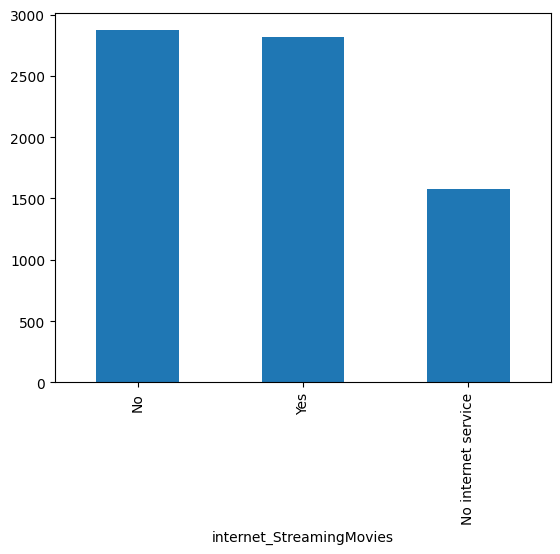

In [24]:
data['internet_StreamingMovies'].value_counts().plot(kind='bar')

<Axes: xlabel='account_Contract'>

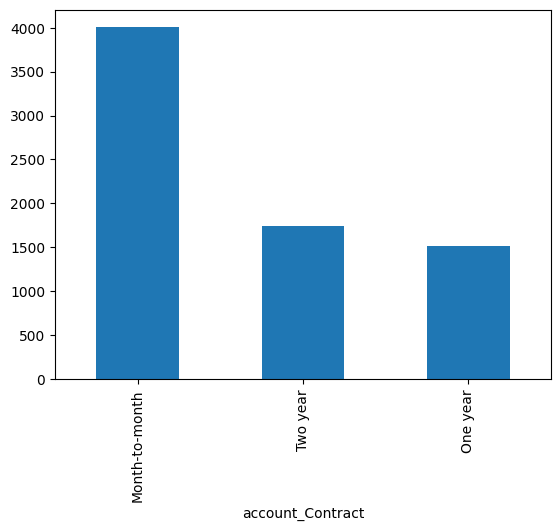

In [25]:
data['account_Contract'].value_counts().plot(kind='bar')

<Axes: xlabel='account_PaperlessBilling'>

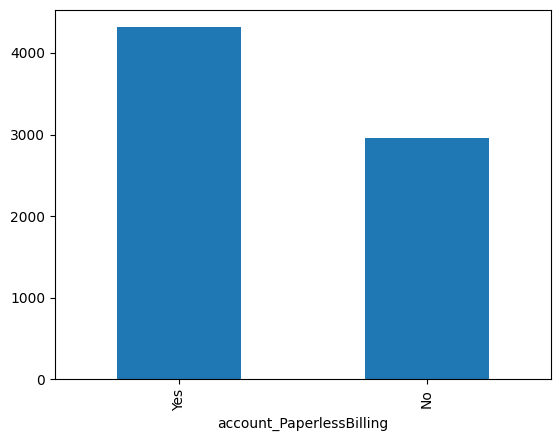

In [26]:
data['account_PaperlessBilling'].value_counts().plot(kind='bar')

<Axes: xlabel='account_PaymentMethod'>

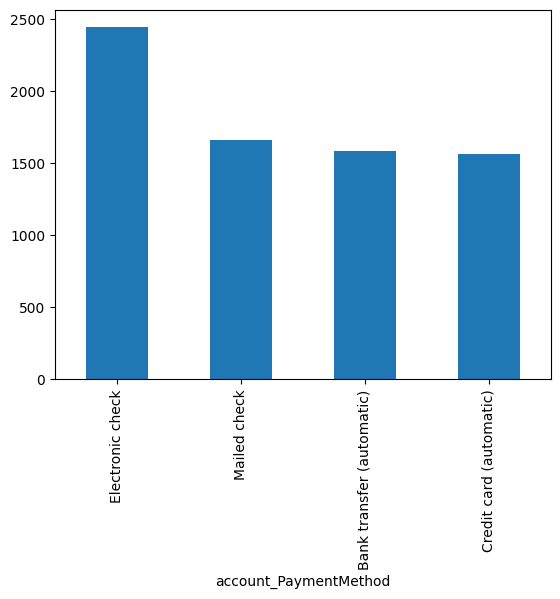

In [27]:
data['account_PaymentMethod'].value_counts().plot(kind='bar')

## Comprobación de incoherencias en los datos

In [28]:
total_registros = len(data)
faltantes_churn = (data['Churn'] == '').sum()
porcentaje_faltantes = (faltantes_churn / total_registros) * 100

print(f"Valores faltantes en 'Churn': {faltantes_churn} ({porcentaje_faltantes:.2f}%)")

Valores faltantes en 'Churn': 224 (3.08%)


## Manejo de inconsistencias

In [29]:
# Reemplazar '' por NaN
data['Churn'] = data['Churn'].replace('', np.nan)

# Eliminar las filas con NaN en Churn
data = data.dropna(subset=['Churn'])

# Reiniciar los índices
data = data.reset_index(drop=True)

/tmp/ipython-input-29-1946687857.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Churn'] = data['Churn'].replace('', np.nan)


In [30]:
# Convertir a booleano
# data['Churn'] = data['Churn'].map({'No': False, 'Yes': True})

<Axes: xlabel='Churn'>

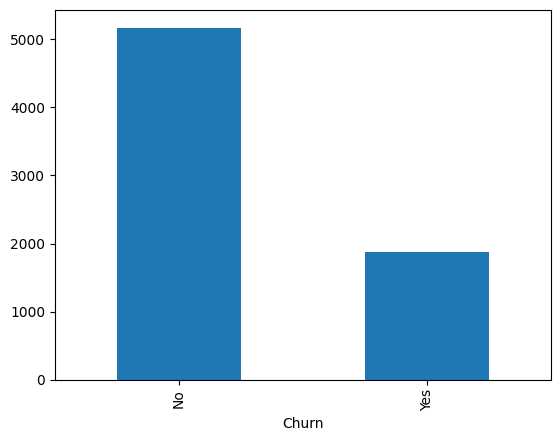

In [31]:
data['Churn'].value_counts().plot(kind='bar')

## Creación de la columna Cuentas_Diarias

In [32]:
data['Cuentas_Diarias'] = (data['account_Charges_Monthly'] / 30).round(2)
data.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## Estandarización y transformación de datos (opcional)

### Rename a las columnas

In [33]:
data.rename(columns={
    'Churn': 'has_churned',
    'customer_gender': 'gender',
    'customer_SeniorCitizen': 'is_senior',
    'customer_Partner': 'has_partner',
    'customer_Dependents': 'has_dependents',
    'customer_tenure': 'tenure_months',
    'phone_PhoneService': 'has_phone_service',
    'phone_MultipleLines': 'has_multiple_lines',
    'internet_InternetService': 'internet_type',
    'internet_OnlineSecurity': 'has_online_security',
    'internet_OnlineBackup': 'has_online_backup',
    'internet_DeviceProtection': 'has_device_protection',
    'internet_TechSupport': 'has_tech_support',
    'internet_StreamingTV': 'has_streaming_tv',
    'internet_StreamingMovies': 'has_streaming_movies',
    'account_Contract': 'contract_type',
    'account_PaperlessBilling': 'uses_paperless_billing',
    'account_PaymentMethod': 'payment_method',
    'account_Charges_Monthly': 'monthly_charges',
    'account_Charges_Total': 'total_charges',
    'Cuentas_Diarias': 'daily_charges_estimate'
}, inplace=True)

In [34]:
# Limpieza de datos nulos para variable categóricas: Imputación por la moda (most_frequent)
# Imputacion de variables categóricas
from sklearn.impute import SimpleImputer
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # ImpNumeros es un objeto de la clase SimpleImputer
data[['has_churned']] = ImpNumeros.fit_transform(data[['has_churned']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   has_churned             7043 non-null   object  
 1   gender                  7043 non-null   category
 2   is_senior               7043 non-null   int64   
 3   has_partner             7043 non-null   category
 4   has_dependents          7043 non-null   category
 5   tenure_months           7043 non-null   int64   
 6   has_phone_service       7043 non-null   category
 7   has_multiple_lines      7043 non-null   category
 8   internet_type           7043 non-null   category
 9   has_online_security     7043 non-null   category
 10  has_online_backup       7043 non-null   category
 11  has_device_protection   7043 non-null   category
 12  has_tech_support        7043 non-null   category
 13  has_streaming_tv        7043 non-null   category
 14  has_streaming_movies    

In [35]:
binary_columns = [
    'has_partner',
    'has_dependents',
    'has_phone_service',
    'uses_paperless_billing'
]

# Remplazar 'Male' por 1 y 'Female' por 0
# data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})
# Reemplazar 'Yes' por 1 y 'No' por 0 en múltiples columnas
data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})

/tmp/ipython-input-35-1096973498.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-35-1096973498.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data[binary_columns] = data[binary_columns].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-35-1096973498.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

In [36]:
data.head()

,has_churned,gender,is_senior,has_partner,has_dependents,tenure_months,has_phone_service,has_multiple_lines,internet_type,has_online_security,has_online_backup,has_device_protection,has_tech_support,has_streaming_tv,has_streaming_movies,contract_type,uses_paperless_billing,payment_method,monthly_charges,total_charges,daily_charges_estimate
0,No,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,No,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,Yes,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,Yes,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,Yes,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

## Análisis descriptivo

In [37]:
data.describe()

,is_senior,tenure_months,monthly_charges,total_charges,daily_charges_estimate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158675
std,0.368612,24.559481,30.090047,2266.794470,1.003088
min,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,35.500000,398.550000,1.180000
50%,0.000000,29.000000,70.350000,1394.550000,2.340000
75%,0.000000,55.000000,89.850000,3786.600000,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


## Distribución de evasión

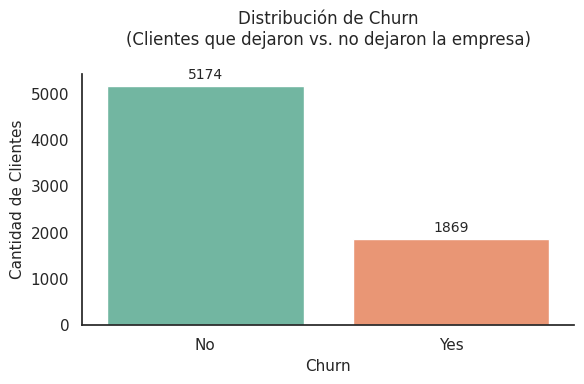

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y paleta
sns.set_theme(style='white')
sns.set_palette('Set2')

# Tamaño de la figura
fig, ax = plt.subplots(figsize=(6, 4))

# Gráfico de conteo
sns.countplot(data=data, x='has_churned', hue='has_churned', dodge=False, legend=False, ax=ax)
sns.despine()

# Etiquetas y título
ax.set_title('Distribución de Churn\n(Clientes que dejaron vs. no dejaron la empresa)\n', fontsize=12)
ax.set_xlabel('Churn', fontsize=11)
ax.set_ylabel('Cantidad de Clientes', fontsize=11)

# Mostrar valores sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

## Recuento de evasión por variables categóricas

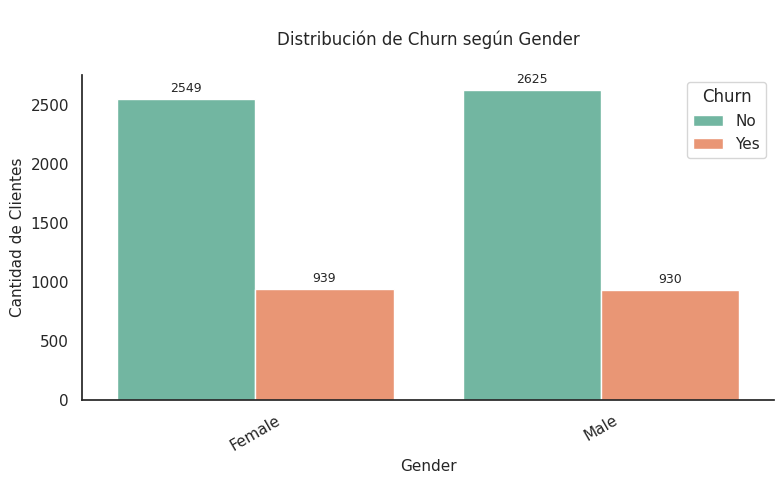

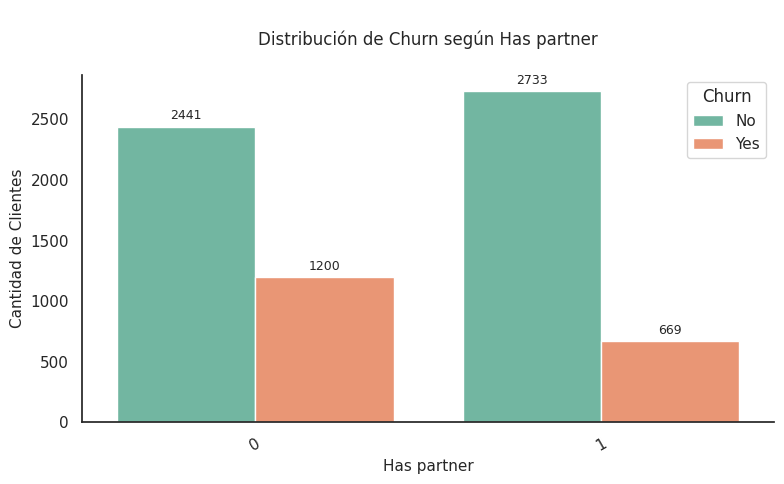

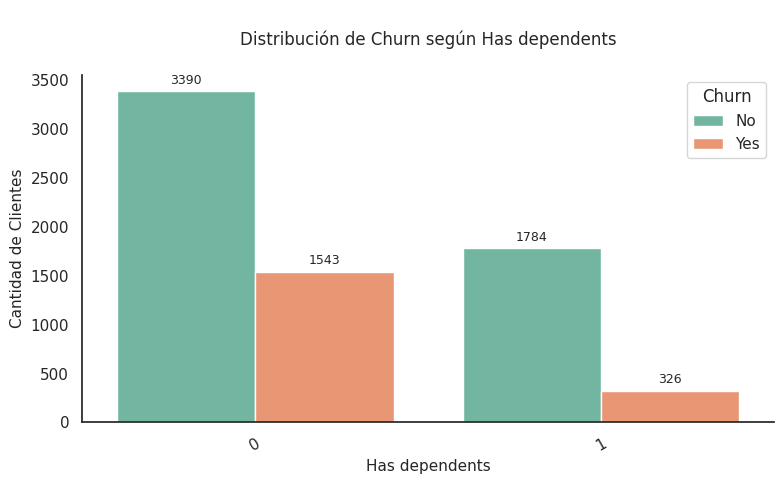

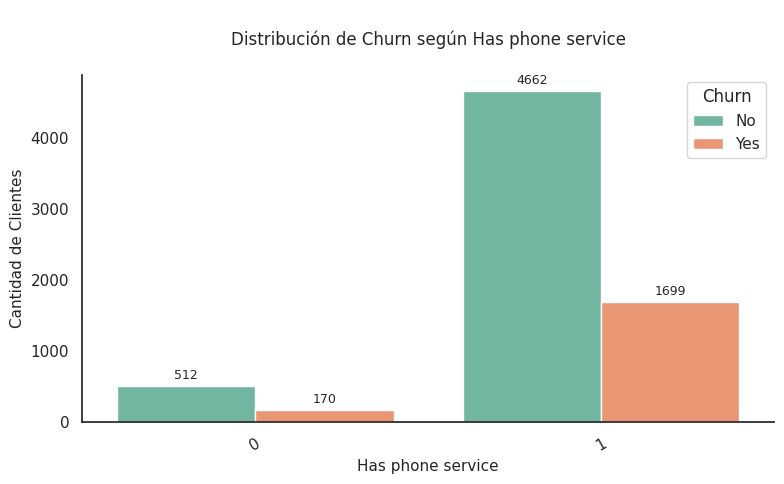

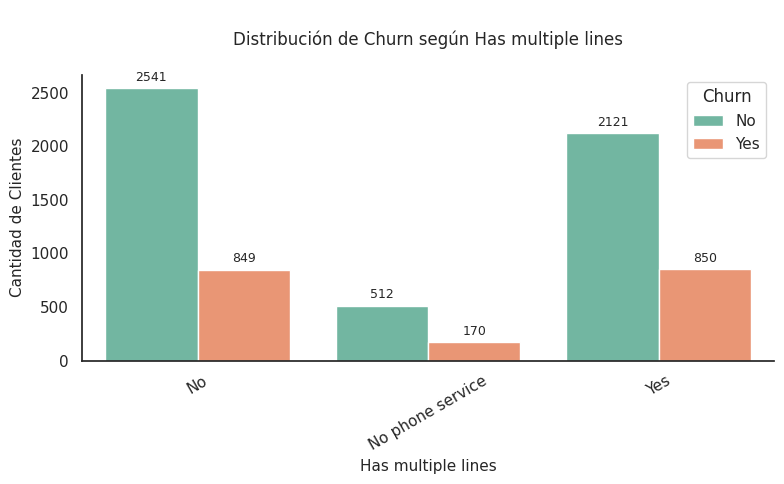

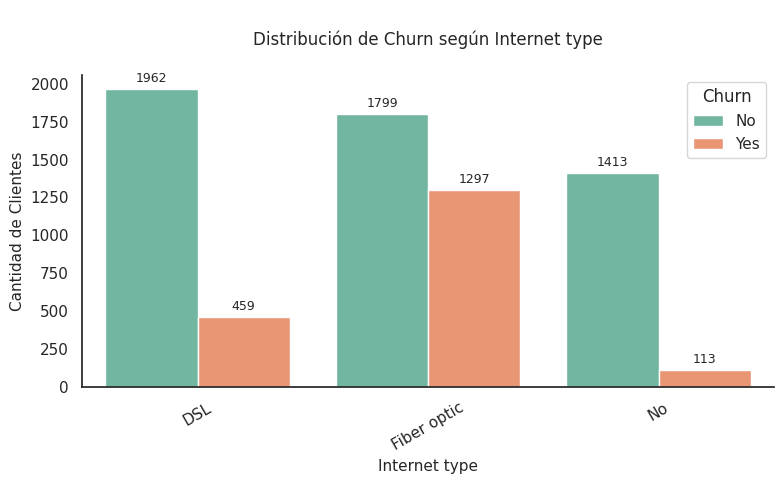

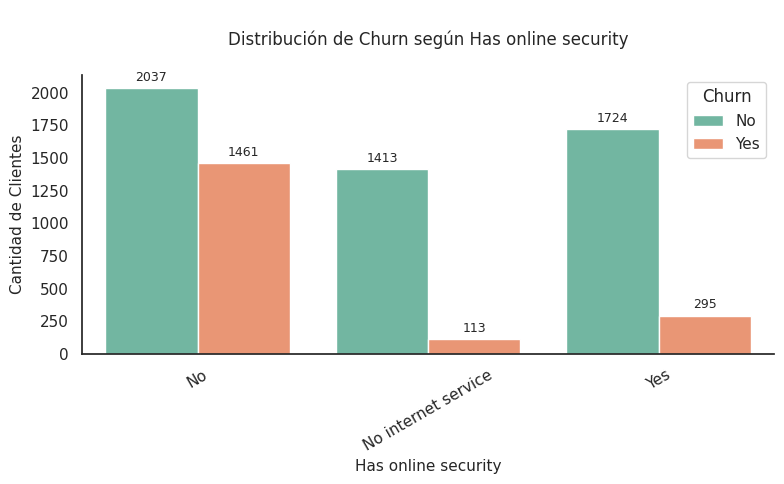

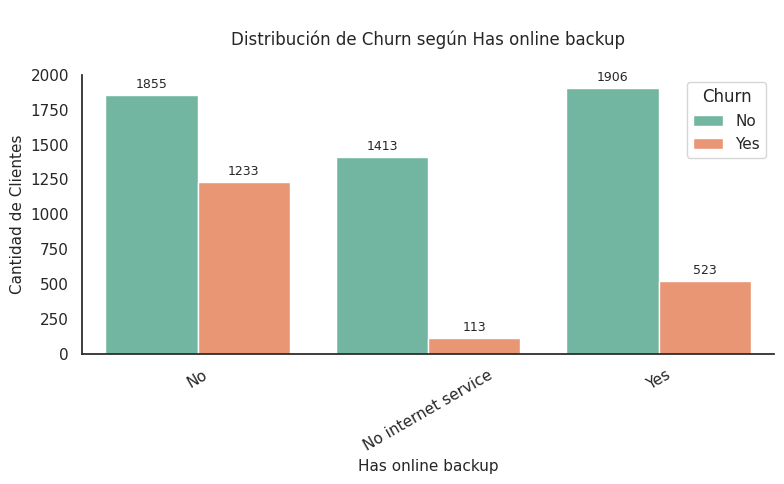

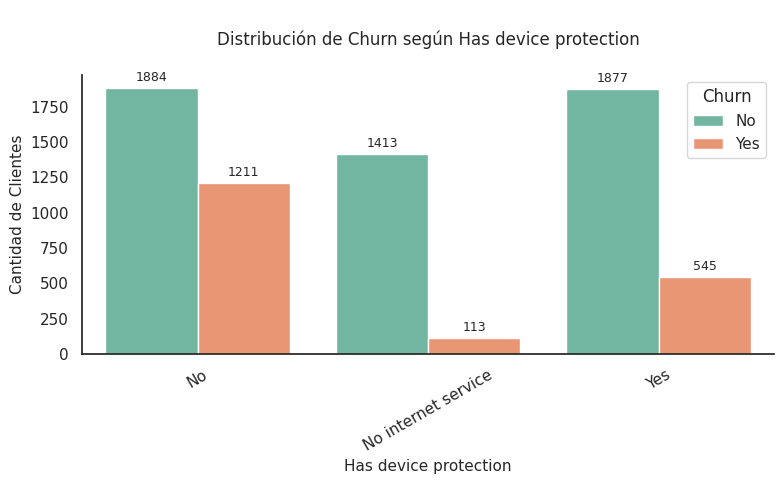

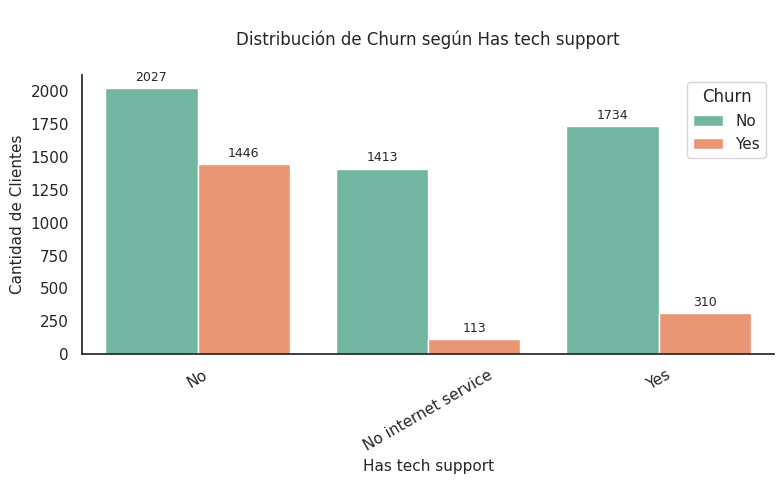

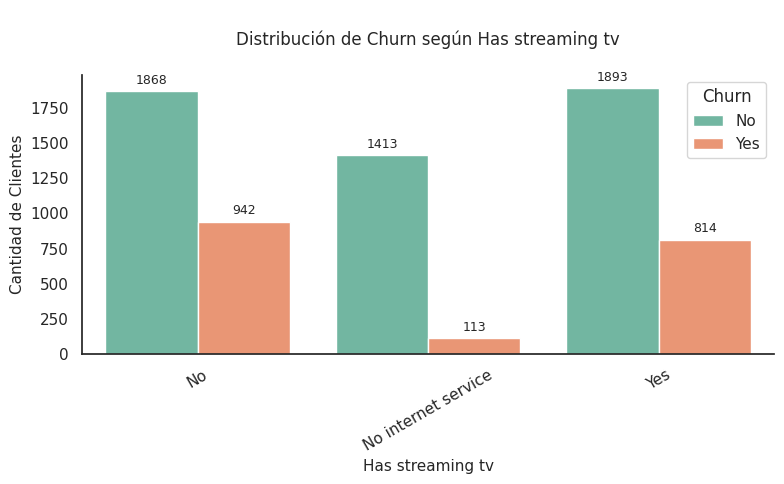

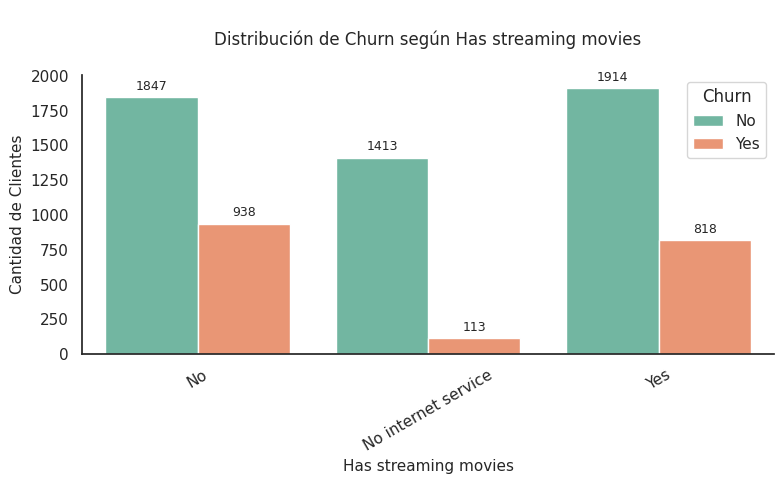

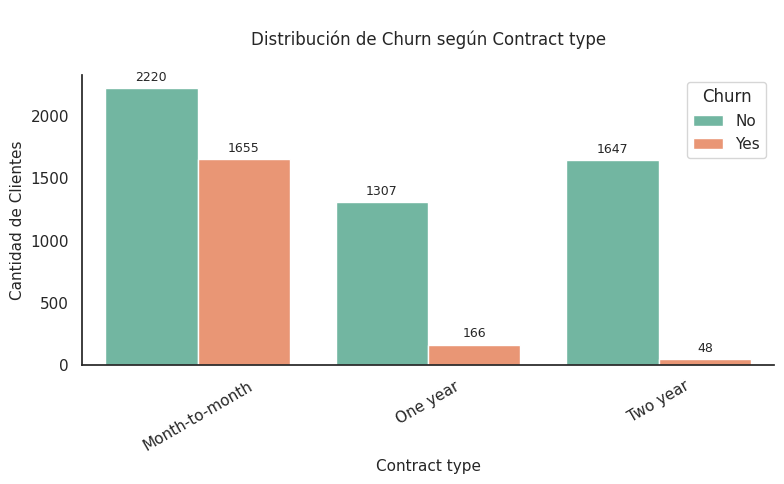

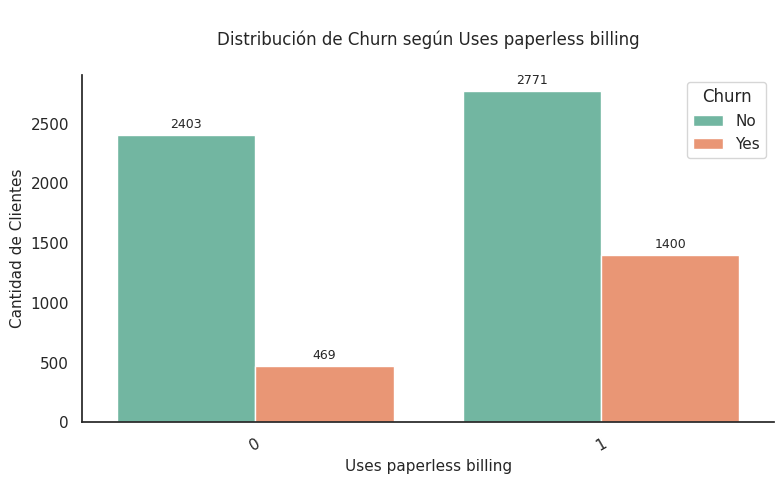

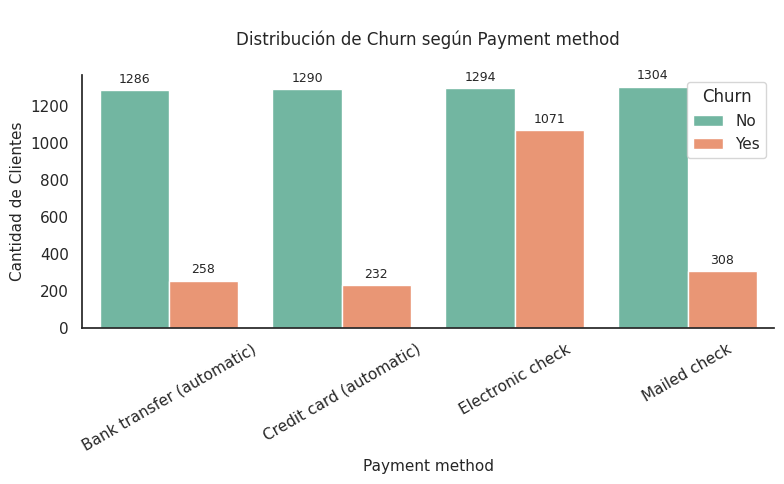

In [39]:
sns.set_theme(style='white')
sns.set_palette('Set2')

# Lista de variables categóricas
variables_categoricas = [
    'gender', 'has_partner', 'has_dependents', 'has_phone_service',
    'has_multiple_lines', 'internet_type', 'has_online_security',
    'has_online_backup', 'has_device_protection', 'has_tech_support',
    'has_streaming_tv', 'has_streaming_movies', 'contract_type',
    'uses_paperless_billing', 'payment_method'
]

# Gráfico por cada variable categórica
for var in variables_categoricas:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.countplot(data=data, x=var, hue='has_churned', ax=ax)

    ax.set_title(f'\nDistribución de Churn según {var.replace("_", " ").capitalize()}\n', fontsize=12)
    ax.set_xlabel(var.replace("_", " ").capitalize(), fontsize=11)
    ax.set_ylabel('Cantidad de Clientes', fontsize=11)
    ax.tick_params(axis='x', rotation=30)

    ax.legend(title='Churn', labels=['No', 'Yes'])

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

    sns.despine()
    plt.tight_layout()
    plt.show()

### Descripción de las gráficas

Estas gráficas muestran la distribución de clientes según diversas variables categóricas, comparando aquellos que permanecen (Churn = No, verde) con los que cancelan (Churn = Yes, naranja). Se analizan factores como género, estado civil, servicios contratados, tipo de contrato y métodos de pago.

- **Distribución de Churn según Género:** La proporción de churn es similar entre hombres y mujeres, con 3390 clientes que no cancelan (verde) y 1543 que sí lo hacen (naranja) en total, lo que indica que el género no parece influir significativamente en la decisión de cancelar.

- **Distribución de Churn según Tiene Pareja (Has Partner):** Los clientes sin pareja tienden a cancelar más (naranja) en proporción que los que tienen pareja, sugiriendo que el estado civil puede influir en la retención.

- **Distribución de Churn según Tiene Dependientes (Has Dependents):** Como se observa en la gráfica proporcionada, de los 3390 clientes sin dependientes (valor 0 en el eje X), 1543 cancelaron (naranja), mientras que de los 1784 con dependientes (valor 1 en el eje X), solo 326 cancelaron (naranja). Esto indica que los clientes con dependientes son menos propensos a cancelar.

- **Distribución de Churn según Servicios y Contratos:** Variables como el tipo de internet, soporte técnico o tipo de contrato también muestran diferencias. Por ejemplo, los clientes con contratos mes a mes (month-to-month) tienen una mayor tasa de churn en comparación con los de contratos a largo plazo (one year o two year), lo que sugiere que la estabilidad contractual reduce la cancelación.

- **Distribución de Churn según Método de Pago:** Los clientes que usan cheques electrónicos (electronic check) tienden a cancelar más que los que usan métodos automáticos (bank transfer o credit card), lo que podría indicar que la facilidad de pago influye en la retención.

En resumen, factores como la falta de dependientes, contratos a corto plazo y métodos de pago menos automatizados están asociados con una mayor probabilidad de churn. La empresa podría implementar estrategias como incentivar contratos a largo plazo, ofrecer descuentos a clientes sin dependientes y promover métodos de pago automáticos para mejorar la retención.

## Conteo de evasión por variables numéricas

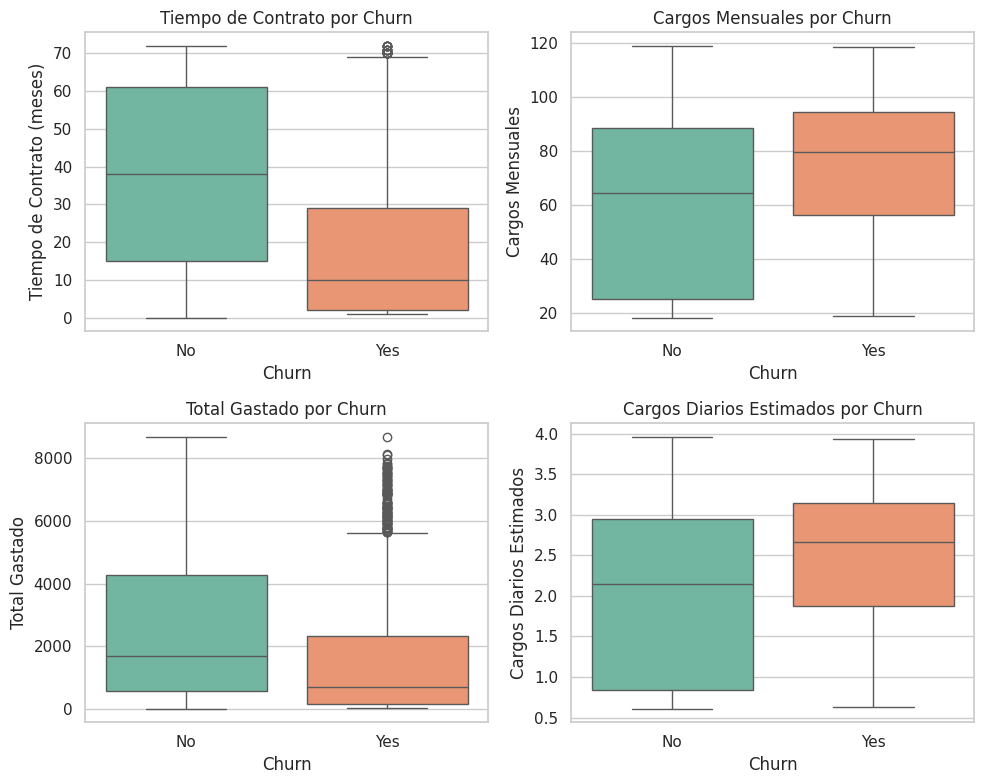

In [40]:
# Lista de variables numéricas a graficar
numeric_vars = [
    ('tenure_months', 'Tiempo de Contrato (meses)', 'Tiempo de Contrato por Churn'),
    ('monthly_charges', 'Cargos Mensuales', 'Cargos Mensuales por Churn'),
    ('total_charges', 'Total Gastado', 'Total Gastado por Churn'),
    ('daily_charges_estimate', 'Cargos Diarios Estimados', 'Cargos Diarios Estimados por Churn')
]

# Configurar tema y paleta
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Set2", n_colors=2)  # Set2 para Yes y No
palette_dict = {'No': palette[0], 'Yes': palette[1]}  # Asignar colores explícitamente

# Configuración de los gráficos (Boxplots)
plt.figure(figsize=(10, 8))

# Iterar para crear boxplots
for i, (var, xlabel, title) in enumerate(numeric_vars, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(x='has_churned', y=var, data=data, hue='has_churned', palette=palette_dict)
  plt.title(title)
  plt.xlabel('Churn')
  plt.ylabel(xlabel)

plt.tight_layout()
plt.show()

### Descripción de las gráficas

Estas gráficas muestran cómo se comportan aspectos clave de los clientes según si permanecen (Churn = No, verde) o cancelan (Churn = Yes, naranja). Se analizan el tiempo como clientes, los pagos mensuales, el gasto total y los cargos diarios estimados.

- **Tiempo de Contrato por Churn:** Los clientes que no cancelan (verde) llevan más tiempo, unos 40 meses en promedio, frente a 20 meses de los que cancelan (naranja). Esto indica que los clientes nuevos tienden a irse antes.

- **Cargos Mensuales por Churn:** Los que cancelan pagan más al mes (80 unidades, naranja) que los que se quedan (60 unidades, verde), sugiriendo que los costos altos influyen en la cancelación.

- **Total Gastado por Churn:** Los clientes que no cancelan gastan más en total (4000 unidades, verde) por su mayor permanencia, mientras que los que cancelan gastan menos (1500 unidades, naranja).

- **Cargos Diarios Estimados por Churn:** Los que cancelan gastan más por día (2.5 unidades, naranja) frente a 2 unidades de los que se quedan (verde), lo que refuerza que los costos altos pueden llevar a la cancelación.

En resumen, los clientes nuevos y los que enfrentan costos altos tienden a cancelar más. La empresa podría ofrecer descuentos a nuevos clientes y planes más baratos para retenerlos, ya que los clientes leales generan más ingresos a largo plazo.

#📄Informe final: Análisis de Evasión de Clientes en TelecomX LATAM

## 🔹 **Introducción**
El objetivo de este análisis es identificar los factores que influyen en la evasión de clientes (representada por la columna has_churned) en TelecomX LATAM, una empresa de telecomunicaciones. La evasión de clientes representa una pérdida significativa de ingresos y afecta la sostenibilidad del negocio. Mediante un análisis exploratorio de datos, se busca identificar patrones y tendencias que permitan a la empresa tomar decisiones estratégicas para reducir la tasa de cancelación y mejorar la retención de clientes.

<br>

## 🔹 **Limpieza y Tratamiento de Datos**
1. **Extracción de Datos:** Los datos fueron obtenidos desde una API pública en formato JSON (`https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json`) utilizando la librería `requests`. Luego, se convirtieron a un DataFrame de pandas con `pd.json_normalize` para facilitar su manejo.
   
2. **Exploración Inicial:** Se utilizó `pd.set_option('display.max_columns', None)` para visualizar todas las columnas del DataFrame. Una muestra aleatoria (`data.sample(5)`) permitió identificar las variables disponibles, que incluyen información del cliente (género, estado civil, dependientes, antigüedad), servicios contratados (teléfono, internet, soporte técnico), tipo de contrato, método de pago y cargos financieros.

3. **Limpieza:**
   - **Manejo de Valores Vacíos:** Se identificaron y manejaron los valores vacíos en la columna `has_churned`, que indica si un cliente abandonó el servicio o no. Los valores vacíos fueron imputados con el valor más frecuente ("No"), asumiendo que la mayoría de los clientes no abandonan el servicio, para evitar sesgos en el análisis.
   - **Verificación de Calidad:** Se verificaron duplicados, valores faltantes en otras columnas y tipos de datos para garantizar la calidad del análisis. No se encontraron duplicados significativos, y los tipos de datos fueron corregidos donde fue necesario (por ejemplo, asegurando que `monthly_charges` y `total_charges` fueran numéricos).
   - **Transformación de Variables:** Para preparar los datos para un futuro uso en modelos de machine learning, se transformaron los valores de las columnas has_partner, has_dependents, has_phone_service, y uses_paperless_billing de "Yes" a 1 y "No" a 0, convirtiendo estas variables categóricas en binarias.

<br>

## 🔹 **Análisis Exploratorio de Datos**
El análisis se dividió en dos partes: variables categóricas y numéricas, con visualizaciones que comparan clientes que permanecen (Churn = 0, verde) y los que cancelan (Churn = 1, naranja).

### **Análisis de Variables Categóricas**
Se analizaron factores como género, estado civil, servicios contratados, tipo de contrato y métodos de pago:
- **Género:** La proporción de churn es similar entre hombres y mujeres (3390 no cancelan vs. 1543 cancelan en total), indicando que el género no influye significativamente.
- **Estado Civil y Dependientes:** Los clientes sin pareja y sin dependientes tienen mayor propensión a cancelar. Por ejemplo, de 3390 clientes sin dependientes, 1543 cancelaron, mientras que de 1784 con dependientes, solo 326 lo hicieron.
- **Tipo de Contrato:** Los clientes con contratos mes a mes tienen una tasa de churn más alta que aquellos con contratos a largo plazo (uno o dos años), lo que sugiere que la estabilidad contractual reduce la evasión.
- **Método de Pago:** Los clientes que pagan con cheque electrónico cancelan más que los que usan métodos automáticos (transferencia bancaria o tarjeta de crédito), indicando que la facilidad de pago impacta la retención.

### **Análisis de Variables Numéricas**
Se examinaron variables como antigüedad, cargos mensuales, total gastado y cargos diarios estimados:
- **Antigüedad (Tenure):** Los clientes que no cancelan tienen una antigüedad promedio de 40 meses, mientras que los que cancelan promedian 20 meses. Esto indica que los clientes nuevos son más propensos a irse.
- **Cargos Mensuales:** Los que cancelan pagan más al mes (80 unidades) que los que se quedan (60 unidades), sugiriendo que los costos altos son un factor de churn.
- **Total Gastado:** Los clientes que permanecen gastan más en total (4000 unidades) debido a su mayor permanencia, frente a 1500 unidades de los que cancelan.
- **Cargos Diarios Estimados:** Los que cancelan gastan más por día (2.5 unidades) que los que se quedan (2 unidades), reforzando la relación entre costos altos y cancelación.

<br>

## 🔹 **Conclusiones e Insights**
1. **Clientes Nuevos y Costos Altos:** Los clientes con menos antigüedad y aquellos que enfrentan cargos mensuales elevados tienen mayor probabilidad de cancelar. Esto sugiere que los primeros meses son críticos para la retención y que los costos altos son un desencadenante clave.
2. **Estabilidad Contractual:** Los contratos a largo plazo (uno o dos años) están asociados con menor churn, mientras que los contratos mes a mes presentan mayor riesgo.
3. **Facilidad de Pago:** Los métodos de pago automáticos (transferencia bancaria o tarjeta de crédito) están vinculados a menor evasión, probablemente porque reducen la fricción en el proceso de pago.
4. **Estado Civil y Dependientes:** Los clientes sin pareja ni dependientes son más propensos a cancelar, lo que podría reflejar menor compromiso o necesidad de los servicios.
5. **Impacto Financiero:** Aunque los clientes que cancelan gastan menos en total, su gasto diario es mayor, lo que indica que perciben el servicio como costoso en relación con el valor recibido.

<br>

## 🔹 **Recomendaciones**
1. **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos o beneficios (como meses gratis) a clientes que opten por contratos de uno o dos años para aumentar la estabilidad y reducir el churn.
2. **Programas para Clientes Nuevos:** Implementar un plan de bienvenida con precios reducidos durante los primeros 6-12 meses para retener a los clientes nuevos, que son más propensos a cancelar.
3. **Revisión de Precios:** Diseñar planes más asequibles o paquetes personalizados para reducir la percepción de costos altos, especialmente para clientes con cargos mensuales elevados.
4. **Promoción de Pagos Automáticos:** Incentivar el uso de métodos de pago automáticos mediante descuentos o recompensas, ya que estos están asociados con mayor retención.
5. **Segmentación de Clientes:** Dirigir campañas específicas a clientes sin dependientes ni pareja, ofreciendo servicios adicionales (como descuentos en streaming o soporte técnico gratuito) para aumentar su compromiso con la empresa.
6. **Mejorar la Propuesta de Valor:** Asegurarse de que los clientes perciban un valor claro por el precio que pagan, por ejemplo, mejorando la calidad del servicio de internet o el soporte técnico, ya que la falta de estos servicios también se asocia con mayor churn.

# 📊 Análisis de Correlación (Extra)

Correlación de variables clave con la evasión de clientes:
churn_num                 1.000000
daily_charges_estimate    0.193412
monthly_charges           0.193356
total_charges            -0.198324
tenure_months            -0.352229
Name: churn_num, dtype: float64


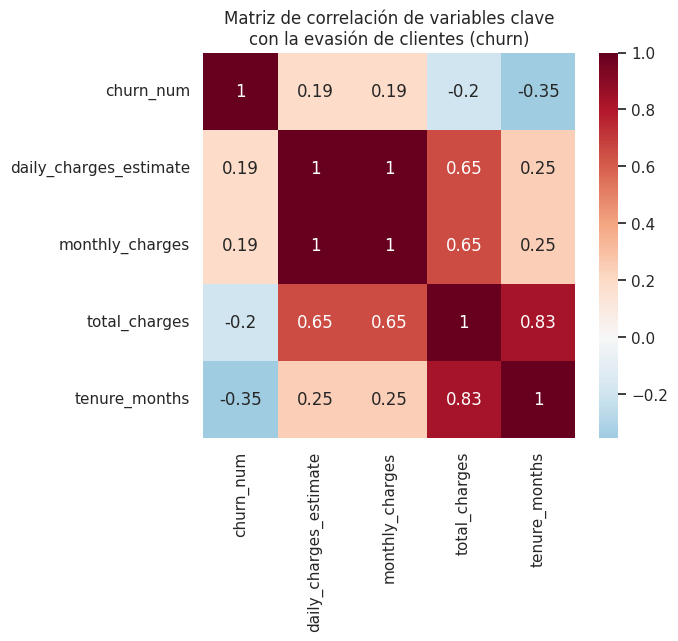

In [41]:
# Preparar datos para correlación
data_corr = data.copy()
data_corr['churn_num'] = data_corr['has_churned'].map({'No': 0, 'Yes': 1})

# Matriz de correlación
correlation_matrix = data_corr[['churn_num','daily_charges_estimate','monthly_charges','total_charges','tenure_months']].corr()

print("Correlación de variables clave con la evasión de clientes:")
print(correlation_matrix['churn_num'].sort_values(ascending=False))

# Visualización: Matriz de correlación
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Matriz de correlación de variables clave\ncon la evasión de clientes (churn)')
plt.show()

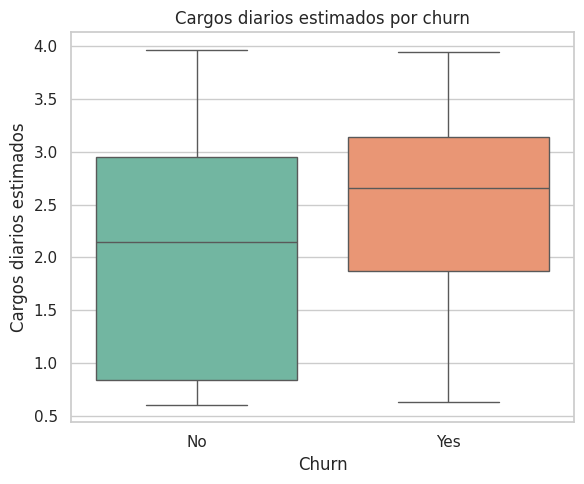

In [42]:
# Boxplot de los cargos diarios estimados por churn
sns.set_theme(style='whitegrid')
palette = sns.color_palette("Set2", n_colors=2)
palette_dict = {'No': palette[0], 'Yes': palette[1]}

plt.figure(figsize=(6, 5))
sns.boxplot(x='has_churned', y='daily_charges_estimate', data=data, hue='has_churned', palette=palette_dict)
plt.title('Cargos diarios estimados por churn')
plt.xlabel('Churn')
plt.ylabel('Cargos diarios estimados')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

Correlación Total Servicios vs Churn: -0.0695


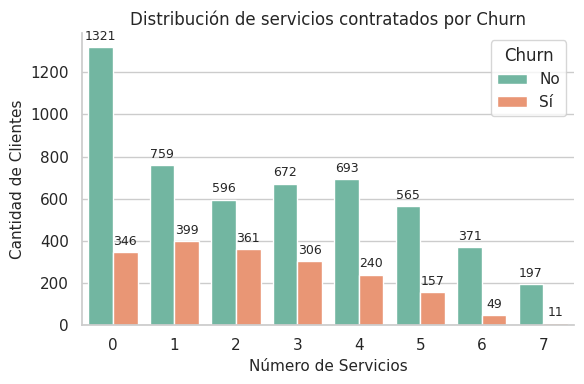

In [43]:
# Cantidad de servicios contratados vs evasión
servicios = ['has_multiple_lines', 'has_online_security', 'has_online_backup',
             'has_device_protection', 'has_tech_support', 'has_streaming_tv', 'has_streaming_movies']

for servicio in servicios:
    data_corr[f'{servicio}_bin'] = data_corr[servicio].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0}).fillna(0)

# Lista con los nombres de las columnas binarias recién creadas
servicios_bin = [f'{s}_bin' for s in servicios]

# Crear una columna que suma la cantidad total de servicios contratados por cliente
data_corr['total_servicios'] = data_corr[servicios_bin].sum(axis=1)  # axis=1 para sumar fila por fila

# Correlación servicios vs churn
corr_servicios = data_corr[['churn_num', 'total_servicios']].corr()
print(f"Correlación Total Servicios vs Churn: {corr_servicios.iloc[0,1]:.4f}")

# Gráfico de distribución de servicios por churn
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data_corr, x='total_servicios', hue='has_churned', palette=palette_dict)
ax.set_title('Distribución de servicios contratados por Churn', fontsize=12)
ax.set_xlabel('Número de Servicios', fontsize=11)
ax.set_ylabel('Cantidad de Clientes', fontsize=11)
ax.legend(title='Churn', labels=['No', 'Sí'])

# Agregar etiquetas con valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()

### Descripción de las gráficas

Estas visualizaciones exploran la relación entre variables clave del comportamiento de los clientes y su probabilidad de cancelación (Churn = No, verde; Churn = Yes, naranja), analizando los cargos diarios, la cantidad de servicios contratados y la antigüedad.

- **Matriz de Correlación:** La antigüedad (tenure_months) y el gasto total (total_charges) tienen correlaciones negativas con la cancelación (-0.35 y -0.20, respectivamente), indicando que los clientes más antiguos y con mayor gasto acumulado tienden a quedarse. Por otro lado, los cargos diarios estimados (daily_charges_estimate) y mensuales (monthly_charges) muestran correlaciones positivas (0.19 para ambos), sugiriendo que costos más altos están asociados con una mayor probabilidad de cancelar.

- **Cargos Diarios Estimados por Churn:** El boxplot muestra que los clientes que cancelan (naranja) tienen cargos diarios más altos (mediana alrededor de 3 unidades) en comparación con los que permanecen (verde, mediana cerca de 2 unidades). Esto indica que un mayor costo diario puede influir en la decisión de cancelar.

- **Distribución de Servicios por Churn:** Los clientes con pocos servicios (1 a 3) son más propensos a cancelar, con 346, 399 y 361 cancelaciones respectivamente (naranja). En cambio, aquellos con 5 o más servicios tienen menos cancelaciones (157 y 49, naranja), mientras que los que no cancelan (verde) predominan en todos los niveles, especialmente con más servicios (565 y 197 para 5 y 6 servicios). La correlación entre total de servicios y churn es negativa (-0.0695), sugiriendo que más servicios fomentan la retención.

En resumen, los clientes con costos diarios elevados y pocos servicios contratados tienen mayor riesgo de cancelar, mientras que los más antiguos y con más servicios tienden a quedarse. La empresa podría enfocarse en reducir los costos diarios y ofrecer paquetes de servicios atractivos para aumentar la fidelidad y disminuir la tasa de cancelación.